In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head(5)

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75 Celcius,NaN,23.89 C,25.76 C,24.28,25.22°C,1012,undetermined,NaN,95,0.82,320.0 °,zero,0,NaN,NaN,100
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58 C,NaN,23.73 C,25.57 C,23.99 C,25.26 C,1012,NaN,NaN,95,0.96 m/s,338.0°,0,0,0,0,100
2,284004000,1979-01-01 02:00:00+00:00,28800,26.6 Celcius,unidentified,24.06 C,26.6 C,26.1 C,27.39,1012,NaN,undetermined,86,1.22 m/s,339.0°,0,volume:zero,NaN,NaN,99
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31 Celcius,NaN,24.37 C,30.9 C,26.59,28.36 C,1012,NaN,undetermined,84,1.08 m/s,342,0.13,nol,0,NaN,94
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05 C,31.54 C,26.58 C,28.31 °C,1011,NaN,undetermined,87,0.86,336.0°,0.34,nol,NaN,0,100


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      341880 non-null  int64 
 1   datetime_iso  341880 non-null  object
 2   time-zone     341880 non-null  int64 
 3   temp          341880 non-null  object
 4   visibility    51112 non-null   object
 5   d_point       341880 non-null  object
 6   feels         341880 non-null  object
 7   min_temp      341880 non-null  object
 8   max_temp      341880 non-null  object
 9   prssr         341880 non-null  object
 10  sea_level     192964 non-null  object
 11  grnd_level    192919 non-null  object
 12  hum           341880 non-null  object
 13  wind_spd      341880 non-null  object
 14  wind_deg      341880 non-null  object
 15  rain_1h       341880 non-null  object
 16  rain_3h       192329 non-null  object
 17  snow_1h       192696 non-null  object
 18  snow_3h       192699 non

Masih ada beberapa kolom yang terdeteksi sebagai object, oleh karena itu kita perlu melakukan pre-processing dan juga data cleaning dalam dataset ini.

In [5]:
import re

def extract_string(column_input):
    if pd.isna(column_input):
        return None
    matches = re.findall(r'\d+\.\d+|\d+', column_input)
    if matches:
        return float(matches[0])
    else:
        return None


In [6]:
train['temp'] = train['temp'].apply(lambda x: extract_string(x))
train['min_temp'] = train['min_temp'].apply(lambda x: extract_string(x))
train['max_temp'] = train['max_temp'].apply(lambda x: extract_string(x))
train['prssr'] = train['prssr'].apply(lambda x: extract_string(x))
train['hum'] = train['hum'].apply(lambda x: extract_string(x))
train['wind_spd'] = train['wind_spd'].apply(lambda x: extract_string(x))
train['rain_1h'] = train['rain_1h'].apply(lambda x: extract_string(x))
train['rain_3h'] = train['rain_3h'].apply(lambda x: extract_string(x))
train['snow_1h'] = train['snow_1h'].apply(lambda x: extract_string(x))
train['snow_3h'] = train['snow_3h'].apply(lambda x: extract_string(x))
train['clouds'] = train['clouds'].apply(lambda x: extract_string(x))
train['d_point'] = train['d_point'].apply(lambda x: extract_string(x))
train['feels'] = train['feels'].apply(lambda x: extract_string(x))
train['wind_deg'] = train['wind_deg'].apply(lambda x: extract_string(x))


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime      341880 non-null  int64  
 1   datetime_iso  341880 non-null  object 
 2   time-zone     341880 non-null  int64  
 3   temp          341880 non-null  float64
 4   visibility    51112 non-null   object 
 5   d_point       341880 non-null  float64
 6   feels         341880 non-null  float64
 7   min_temp      341880 non-null  float64
 8   max_temp      341880 non-null  float64
 9   prssr         341880 non-null  float64
 10  sea_level     192964 non-null  object 
 11  grnd_level    192919 non-null  object 
 12  hum           341880 non-null  float64
 13  wind_spd      341880 non-null  float64
 14  wind_deg      341880 non-null  float64
 15  rain_1h       315282 non-null  float64
 16  rain_3h       155226 non-null  float64
 17  snow_1h       166482 non-null  float64
 18  snow

In [8]:
train.head(10)

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.0,0.82,320.0,NaN,0.0,NaN,NaN,100.0
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.0,0.96,338.0,0.00,0.0,0.0,0.0,100.0
2,284004000,1979-01-01 02:00:00+00:00,28800,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.0,1.22,339.0,0.00,NaN,NaN,NaN,99.0
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.0,1.08,342.0,0.13,NaN,0.0,NaN,94.0
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.0,0.86,336.0,0.34,NaN,NaN,0.0,100.0
5,284014800,1979-01-01 05:00:00+00:00,28800,28.08,NaN,24.92,32.79,27.36,29.40,1010.0,NaN,NaN,83.0,0.84,7.0,3.33,NaN,NaN,NaN,100.0
6,284018400,1979-01-01 06:00:00+00:00,28800,28.68,NaN,24.25,33.29,27.62,31.02,1010.0,undetermined,undetermined,77.0,0.82,309.0,8.01,NaN,NaN,NaN,100.0
7,284022000,1979-01-01 07:00:00+00:00,28800,28.62,NaN,25.85,34.70,28.12,29.35,1010.0,NaN,not recorded,85.0,0.71,291.0,2.54,NaN,NaN,0.0,95.0
8,284025600,1979-01-01 08:00:00+00:00,28800,26.55,NaN,24.21,26.55,26.09,26.83,1009.0,undetermined,undetermined,87.0,0.62,285.0,1.29,0.0,NaN,NaN,97.0
9,284029200,1979-01-01 09:00:00+00:00,28800,26.38,NaN,24.97,26.38,25.68,29.02,1009.0,NaN,undetermined,92.0,0.44,294.0,0.39,0.0,NaN,0.0,92.0


In [9]:
train_selected_column = train[['temp','d_point','feels','min_temp','max_temp','prssr','hum','wind_spd','wind_deg','rain_1h','clouds']]
train_selected_column.head(5)

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
0,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,NaN,100.0
1,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,0.00,100.0
2,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,0.00,99.0
3,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,0.13,94.0
4,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,0.34,100.0


In [10]:
missing_percentage = (train_selected_column.isnull().sum() / len(train_selected_column)) * 100
missing_info = pd.DataFrame({'Missing Percentage': missing_percentage})

In [11]:
print(missing_info)

          Missing Percentage
temp                0.000000
d_point             0.000000
feels               0.000000
min_temp            0.000000
max_temp            0.000000
prssr               0.000000
hum                 0.000000
wind_spd            0.000000
wind_deg            0.000000
rain_1h             7.779923
clouds              0.000000


In [12]:
train_filled = train_selected_column.fillna(train_selected_column.mean())
train_filled.isna().sum()

temp        0
d_point     0
feels       0
min_temp    0
max_temp    0
prssr       0
hum         0
wind_spd    0
wind_deg    0
rain_1h     0
clouds      0
dtype: int64

In [13]:
train_filled.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
0,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,0.401359,100.0
1,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,0.000000,100.0
2,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,0.000000,99.0
3,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,0.130000,94.0
4,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,0.340000,100.0


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train_filled)
scaled_df = pd.DataFrame(train_scaled, columns=train_filled.columns)
scaled_df.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds
0,0.020551,0.077803,0.018907,0.068280,0.017294,0.002673,0.139241,0.0328,0.176717,0.014810,1.00
1,0.019459,0.076549,0.017853,0.066331,0.017536,0.002673,0.139241,0.0384,0.186658,0.000000,1.00
2,0.032432,0.079135,0.023564,0.080511,0.030461,0.002673,0.120253,0.0488,0.187210,0.000000,0.99
3,0.036992,0.081564,0.047405,0.083804,0.036347,0.002673,0.116034,0.0432,0.188867,0.004797,0.94
4,0.037634,0.086892,0.050954,0.083737,0.036044,0.002430,0.122363,0.0344,0.185553,0.012546,1.00


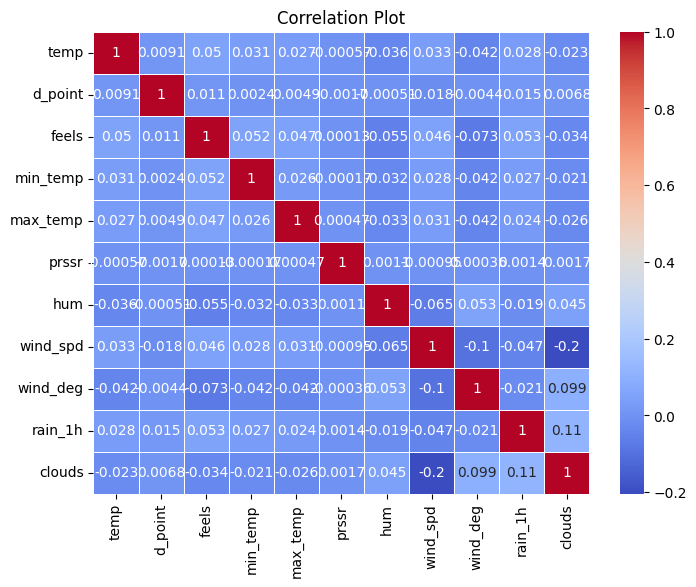

In [25]:
# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [19]:
X = scaled_df.drop('rain_1h', axis = 1)
y = scaled_df['rain_1h']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)